In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
def w(m,n,x):
    x[x==0]=1e-20;
    return (np.exp(1j*n*2*np.pi*x)-np.exp(1j*m*2*np.pi*x))/(1j*(n-m)*2*np.pi*x);

In [27]:
def wb(m,n,x):
    return np.conjugate(w(m,n,x));

In [222]:
fmax = 50; dt = 1/(20*fmax); tmax = 1;
time = np.arange(dt,tmax+dt,dt);
f1,f2,f3 = 10,30,50;
p1,p2,p3 = np.random.uniform(np.pi),np.random.uniform(np.pi),np.random.uniform(np.pi);
th = np.sin(2*np.pi*f1*time+p1)+\
     np.sin(2*np.pi*f2*time+p2)+\
     np.sin(2*np.pi*f3*time);

In [238]:
th = w(10,0,time-0.5)*0.2+w(10,0,time-0.2)*3;

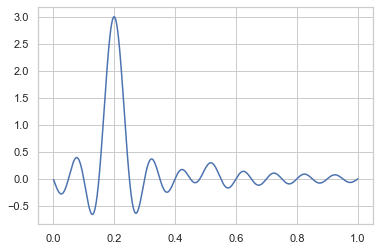

In [239]:
plt.plot(time,th);

In [240]:
def a(m,n,k,time,th):
    ff = th*wb(m,n,time-k/(n-m));
    int_ff = np.trapz(ff,time);
    int_ff *= (n-m)
    return int_ff;

In [241]:
def ab(m,n,k,time,th):
    ff = th*w(m,n,time-k/(n-m));
    int_ff = np.trapz(ff,time);
    int_ff *= (n-m)
    return int_ff;

In [242]:
p = 20; k2 = 5; k1 = -k2;
bw = fmax/p;
m = np.arange(0,fmax,bw)
n = m+bw;

In [243]:
bw

2.5

In [244]:
new_th = np.zeros(len(th),'complex');
for i in range(len(m)):
    for k in range(k1,k2):
        new_th += a(m[i],n[i],k,time,th)*w(m[i],n[i],time-k/(n[i]-m[i]))\
                   +ab(m[i],n[i],k,time,th)*wb(m[i],n[i],time-k/(n[i]-m[i]));

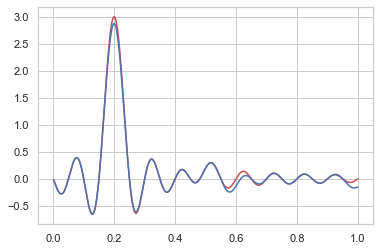

In [245]:
plt.plot(time,th,'r-');
plt.plot(time,new_th,'b-');